In [1]:
# ===== Core Python & Data Libraries =====
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings("ignore")

# ===== TensorFlow / Keras =====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, Conv2D, Dense, BatchNormalization, Flatten,
    MaxPooling1D, Dropout, LSTM, SimpleRNN
)
from tensorflow.keras.utils import to_categorical

# ===== Scikit-learn =====
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import plot_tree
from sklearn import tree

# ===== Colab Upload Tools =====
from google.colab import files
import io

print("✅ All libraries imported successfully.")


✅ All libraries imported successfully.


In [2]:
# --- STEP 1: Upload cleaned climate dataset ---
print("📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
climate = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded cleaned climate dataset: {first_file}")

# Preview
print("\n🌦 Climate data preview:")
display(climate.head())


# --- STEP 2: Upload prediction dataset ---
print("\n📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
prediction = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded prediction dataset: {first_file}")

# Preview
print("\n🔎 Prediction data preview:")
display(prediction.head())


📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)


Saving climate_clean_data_new.csv to climate_clean_data_new.csv
✅ Loaded cleaned climate dataset: climate_clean_data_new.csv

🌦 Climate data preview:


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4



📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'


Saving Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv to Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
✅ Loaded prediction dataset: Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv

🔎 Prediction data preview:


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
climate.shape

(22950, 137)

In [4]:
prediction.shape

(22950, 16)

In [5]:
# Create a list of the columns containing "MAASTRICHT" in their names
maastricht_list = [col for col in climate.columns if 'MAASTRICHT' in col.upper()]
maastricht_list

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [6]:
# Create a DataFrame with the Maastricht columns
df_maastricht = climate[maastricht_list]
df_maastricht

,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1
1,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9
2,7,0.97,1.0167,0.12,0.46,0.0,6.9,5.5,9.9
3,7,0.89,1.0277,0.16,0.00,0.3,7.0,3.0,10.0
4,7,0.92,1.0259,0.12,0.56,0.0,8.1,2.5,11.1
...,...,...,...,...,...,...,...,...,...
22945,8,0.67,1.0201,1.17,0.20,5.3,18.6,14.1,22.6
22946,7,0.70,1.0190,1.17,0.20,5.0,18.9,15.8,23.5
22947,8,0.69,1.0183,1.17,0.20,3.2,18.2,13.7,24.3
22948,8,0.73,1.0181,1.17,0.20,6.8,16.3,12.8,21.4


In [7]:
# Reduce prediction dataset to Maastricht's answers only
answers_maastricht = prediction['MAASTRICHT_pleasant_weather']
answers_maastricht


,MAASTRICHT_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [8]:
df_maastricht.shape # observations dataset has the correct shape

(22950, 9)

In [9]:
answers_maastricht.shape # predictions dataset has the correct shape

(22950,)

In [10]:
X2 = df_maastricht

In [11]:
y2 = answers_maastricht

In [12]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [13]:
X.shape

(22950, 9)

In [14]:
y.shape

(22950,)

In [15]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [17]:
X_train

array([[  3.    ,   0.71  ,   1.0144, ...,  17.7   ,  11.1   ,  23.    ],
       [  4.    ,   0.76  ,   1.0171, ...,  -3.8   ,  -8.    ,   0.4   ],
       [  5.    ,   0.92  ,   1.0108, ...,  -6.1   , -11.    ,  -3.1   ],
       ...,
       [  7.    ,   0.88  ,   1.0096, ...,   7.3   ,   3.5   ,   9.1   ],
       [  6.    ,   0.77  ,   1.0134, ...,  10.4   ,   8.4   ,  14.1   ],
       [  1.    ,   0.69  ,   1.0245, ...,   7.6   ,   2.8   ,  12.6   ]])

In [18]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [19]:
X_test

array([[ 4.    ,  0.8   ,  1.0166, ..., 12.2   ,  7.9   , 18.2   ],
       [ 8.    ,  0.73  ,  1.0063, ...,  2.7   ,  0.5   ,  5.6   ],
       [ 6.    ,  0.86  ,  1.0083, ..., 16.9   , 15.3   , 18.5   ],
       ...,
       [ 1.    ,  0.86  ,  1.0121, ..., 11.5   ,  5.9   , 19.4   ],
       [ 7.    ,  0.82  ,  1.0266, ...,  7.    ,  5.3   ,  9.8   ],
       [ 7.    ,  0.86  ,  1.0207, ..., 11.1   ,  7.    , 13.5   ]])

In [20]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


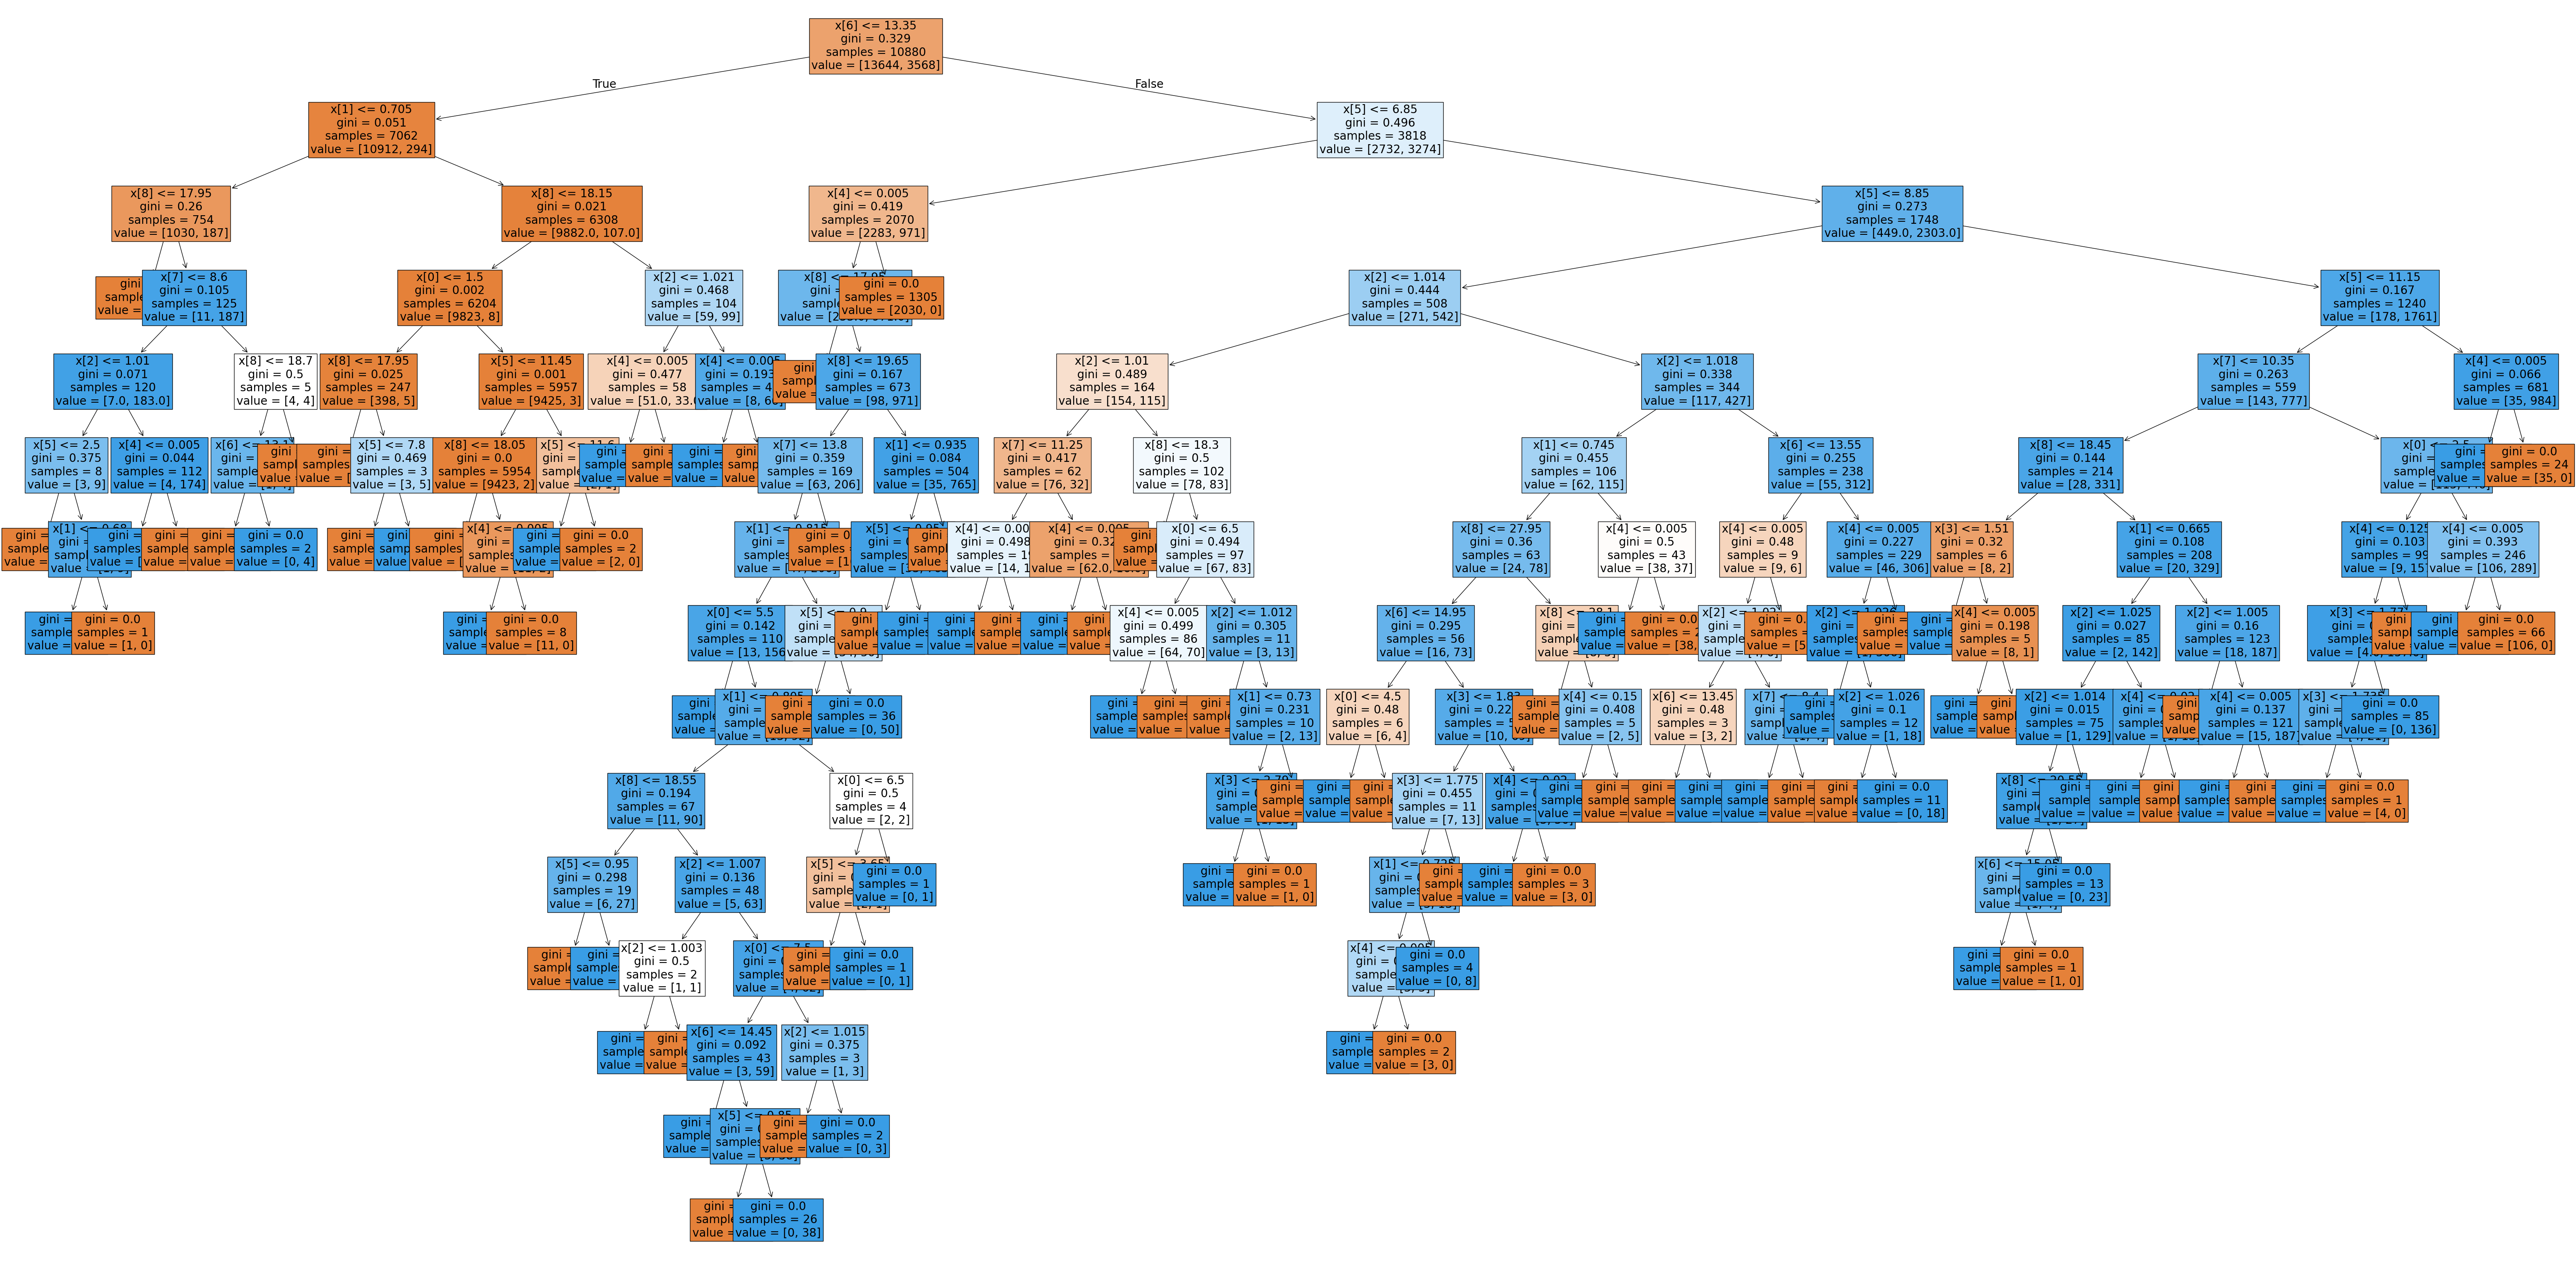

In [23]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [24]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03017667, 0.01410889, 0.01242095, 0.08484216, 0.32686237,
       0.07596779, 0.13730795, 0.01802638, 0.30028686])

In [25]:
# Create a list of weather features

wx_list = [feature.replace('MAASTRICHT_', '') for feature in maastricht_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [26]:
important = pd.Series(newarray, index = wx_list)
important

,0
cloud_cover,0.030177
humidity,0.014109
pressure,0.012421
global_radiation,0.084842
precipitation,0.326862
sunshine,0.075968
temp_mean,0.137308
temp_min,0.018026
temp_max,0.300287


['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


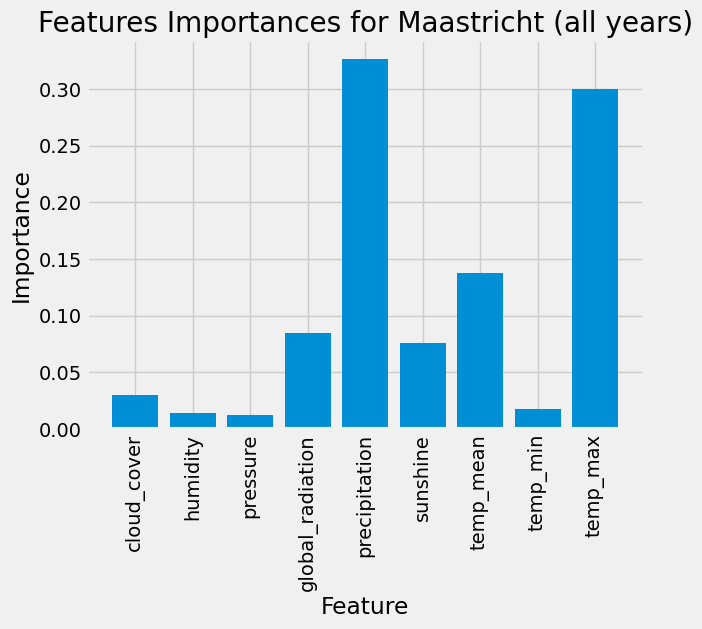

In [27]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Maastricht (all years)');
